<a href="https://colab.research.google.com/github/Yihuiny/Global-Food-Wastage/blob/main/foodwastageproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
df = pd.read_csv ("/content/drive/MyDrive/data sets/global_food_wastage_dataset.csv")
df.head(10)

,Country,Year,Food Category,Total Waste (Tons),Economic Loss (Million $),Avg Waste per Capita (Kg),Population (Million),Household Waste (%)
0,Australia,2019,Fruits & Vegetables,19268.63,18686.68,72.69,87.59,53.64
1,Indonesia,2019,Prepared Food,3916.97,4394.48,192.52,1153.99,30.61
2,Germany,2022,Dairy Products,9700.16,8909.16,166.94,1006.11,48.08
3,France,2023,Fruits & Vegetables,46299.69,40551.22,120.19,953.05,31.91
4,France,2023,Beverages,33096.57,36980.82,104.74,1105.47,36.06
5,India,2024,Fruits & Vegetables,11962.89,11196.04,136.21,1311.91,37.09
6,Germany,2024,Prepared Food,45038.72,39191.25,179.27,1349.45,68.93
7,China,2019,Fruits & Vegetables,12791.20,12233.28,90.80,1229.29,59.90
8,UK,2019,Meat & Seafood,14795.65,14346.97,128.91,450.33,59.01
9,India,2019,Grains & Cereals,12118.32,13631.17,141.75,359.26,42.42


In [76]:
len(df)

5000

In [77]:
df.shape

(5000, 8)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    5000 non-null   object 
 1   Year                       5000 non-null   int64  
 2   Food Category              5000 non-null   object 
 3   Total Waste (Tons)         5000 non-null   float64
 4   Economic Loss (Million $)  5000 non-null   float64
 5   Avg Waste per Capita (Kg)  5000 non-null   float64
 6   Population (Million)       5000 non-null   float64
 7   Household Waste (%)        5000 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 312.6+ KB


In [79]:
#check for duplicates
duplicate = df.duplicated().sum()

if duplicate:
  print("Duplicate data in existence: ", duplicate)
else:
  print("No duplicates traced")

No duplicates traced


In [80]:
df.isna().sum()
#no null values

,0
Country,0
Year,0
Food Category,0
Total Waste (Tons),0
Economic Loss (Million $),0
Avg Waste per Capita (Kg),0
Population (Million),0
Household Waste (%),0


In [81]:
#number of unique countries
len(df["Country"].unique())

20

In [82]:
len(df["Year"].unique())
#data coverage for a period of 7 years

7

In [83]:
#number of unique food categories
len(df["Food Category"].unique())

8

In [84]:
df["Food Category"].unique()
#unique food categories

array(['Fruits & Vegetables', 'Prepared Food', 'Dairy Products',
       'Beverages', 'Meat & Seafood', 'Grains & Cereals', 'Frozen Food',
       'Bakery Items'], dtype=object)

In [85]:
df["Country"].unique()
#unique countries in the data set

array(['Australia', 'Indonesia', 'Germany', 'France', 'India', 'China',
       'UK', 'South Africa', 'Japan', 'USA', 'Brazil', 'Saudi Arabia',
       'Italy', 'Spain', 'Mexico', 'Argentina', 'Canada', 'South Korea',
       'Russia', 'Turkey'], dtype=object)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    5000 non-null   object 
 1   Year                       5000 non-null   int64  
 2   Food Category              5000 non-null   object 
 3   Total Waste (Tons)         5000 non-null   float64
 4   Economic Loss (Million $)  5000 non-null   float64
 5   Avg Waste per Capita (Kg)  5000 non-null   float64
 6   Population (Million)       5000 non-null   float64
 7   Household Waste (%)        5000 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 312.6+ KB


In [87]:
df.describe()

,Year,Total Waste (Tons),Economic Loss (Million $),Avg Waste per Capita (Kg),Population (Million),Household Waste (%)
count,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2021.015600,25061.780072,25039.703870,109.46397,706.606416,50.060890
std,1.999239,14245.119588,14620.236429,51.93373,402.546464,11.596203
min,2018.000000,502.610000,406.690000,20.09000,11.290000,30.020000
25%,2019.000000,12783.737500,12612.477500,64.05000,350.602500,40.012500
50%,2021.000000,24865.220000,24428.155000,110.08000,713.530000,50.295000
75%,2023.000000,37471.035000,37146.037500,154.52500,1057.255000,60.125000
max,2024.000000,49990.760000,59228.930000,199.97000,1399.970000,70.000000


In [88]:
#top 15 countries with the highest percentage of household waste

df.sort_values(by="Household Waste (%)", ascending=False).head(15)

,Country,Year,Food Category,Total Waste (Tons),Economic Loss (Million $),Avg Waste per Capita (Kg),Population (Million),Household Waste (%)
2961,Argentina,2021,Dairy Products,2843.54,2454.58,146.99,320.19,70.00
2047,Indonesia,2024,Beverages,34860.29,30988.40,32.18,935.91,69.99
884,Italy,2020,Meat & Seafood,47037.46,37722.96,35.83,63.44,69.99
2193,Japan,2020,Prepared Food,47608.92,55268.50,52.68,618.59,69.99
1528,UK,2018,Prepared Food,34932.96,31002.47,24.41,234.78,69.99
4949,Russia,2022,Prepared Food,24389.20,22916.51,42.54,727.53,69.98
3616,Brazil,2023,Fruits & Vegetables,29196.12,24627.33,186.14,889.40,69.98
3914,China,2018,Dairy Products,21886.53,21929.06,54.64,981.93,69.96
4091,Italy,2021,Meat & Seafood,41616.06,45467.27,198.75,971.50,69.96
1060,Indonesia,2020,Meat & Seafood,1562.07,1350.58,131.14,95.66,69.96


In [89]:
df.groupby("Food Category")["Country"].sum().sort_values(ascending=False).head(5)

,Country
Food Category,
Bakery Items,USABrazilArgentinaArgentinaUSAJapanRussiaGerma...
Meat & Seafood,UKUSAUKIndiaMexicoArgentinaUKMexicoSaudi Arabi...
Frozen Food,South AfricaJapanBrazilFranceIndonesiaCanadaSo...
Prepared Food,IndonesiaGermanySaudi ArabiaChinaSaudi ArabiaB...
Grains & Cereals,IndiaBrazilUKSouth KoreaAustraliaTurkeyJapanSo...


In [90]:
df.sort_values(by="Country", ascending=False)[["Food Category", "Country"]].head(15)

,Food Category,Country
356,Frozen Food,USA
4026,Prepared Food,USA
3253,Grains & Cereals,USA
1035,Grains & Cereals,USA
3748,Frozen Food,USA
821,Grains & Cereals,USA
1486,Bakery Items,USA
1826,Frozen Food,USA
2048,Fruits & Vegetables,USA
2508,Dairy Products,USA


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    5000 non-null   object 
 1   Year                       5000 non-null   int64  
 2   Food Category              5000 non-null   object 
 3   Total Waste (Tons)         5000 non-null   float64
 4   Economic Loss (Million $)  5000 non-null   float64
 5   Avg Waste per Capita (Kg)  5000 non-null   float64
 6   Population (Million)       5000 non-null   float64
 7   Household Waste (%)        5000 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 312.6+ KB


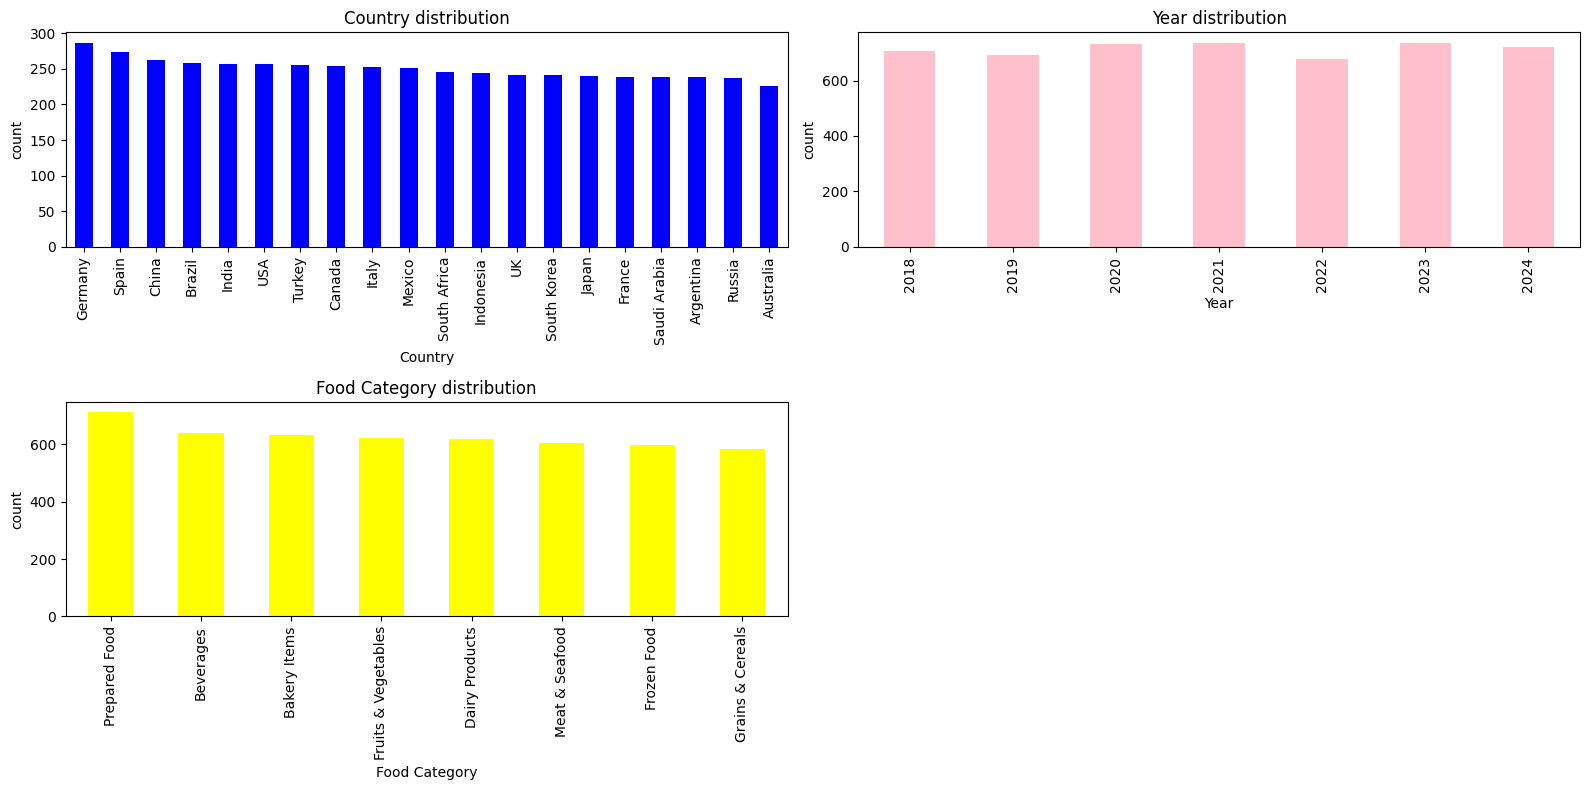

In [92]:
#distribution
#country, year & food category

plt.figure(figsize=(16, 8))

plt.subplot(2, 2, 1)
df["Country"].value_counts().plot(kind= "bar", color ="Blue")
plt.title("Country distribution")
plt.xlabel("Country")
plt.ylabel("count")


plt.subplot(2, 2, 2)
df["Year"].value_counts().sort_index().plot(kind= "bar", color ="Pink")
plt.title("Year distribution")
plt.xlabel("Year")
plt.ylabel("count")



plt.subplot(2, 2, 3)
df["Food Category"].value_counts().plot(kind= "bar", color ="Yellow")
plt.title("Food Category distribution")
plt.xlabel("Food Category")
plt.ylabel("count")
plt.tight_layout()
plt.show()

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    5000 non-null   object 
 1   Year                       5000 non-null   int64  
 2   Food Category              5000 non-null   object 
 3   Total Waste (Tons)         5000 non-null   float64
 4   Economic Loss (Million $)  5000 non-null   float64
 5   Avg Waste per Capita (Kg)  5000 non-null   float64
 6   Population (Million)       5000 non-null   float64
 7   Household Waste (%)        5000 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 312.6+ KB


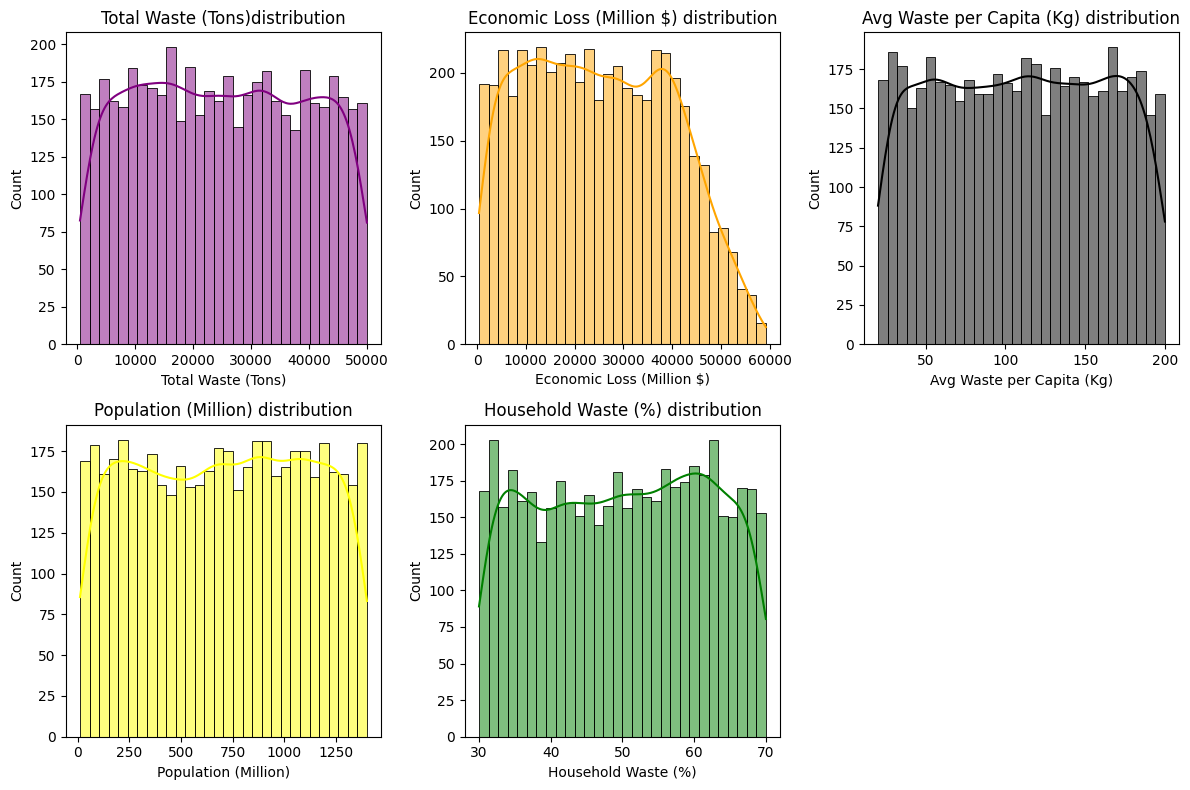

In [94]:
#distribution total wastage, economic loss, avg waste, population & household waste

plt.figure(figsize= (12, 8))

plt.subplot(2, 3, 1)
sns.histplot(df["Total Waste (Tons)"], bins = 30, color="Purple", kde=True)
plt.title("Total Waste (Tons)distribution")
plt.xlabel("Total Waste (Tons)")

plt.subplot(2, 3, 2)
sns.histplot(df["Economic Loss (Million $)"], bins = 30, color="Orange", kde=True)
plt.title("Economic Loss (Million $) distribution")
plt.xlabel("Economic Loss (Million $)")


plt.subplot(2, 3, 3)
sns.histplot(df["Avg Waste per Capita (Kg)"], bins = 30, color="Black", kde=True)
plt.title("Avg Waste per Capita (Kg) distribution")
plt.xlabel("Avg Waste per Capita (Kg)")


plt.subplot(2, 3, 4)
sns.histplot(df["Population (Million)"], bins = 30, color="Yellow", kde=True)
plt.title("Population (Million) distribution")
plt.xlabel("Population (Million)")


plt.subplot(2, 3, 5)
sns.histplot(df["Household Waste (%)"], bins = 30, color="Green", kde=True)
plt.title("Household Waste (%) distribution")
plt.xlabel("Household Waste (%)")

plt.tight_layout()
plt.show()

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    5000 non-null   object 
 1   Year                       5000 non-null   int64  
 2   Food Category              5000 non-null   object 
 3   Total Waste (Tons)         5000 non-null   float64
 4   Economic Loss (Million $)  5000 non-null   float64
 5   Avg Waste per Capita (Kg)  5000 non-null   float64
 6   Population (Million)       5000 non-null   float64
 7   Household Waste (%)        5000 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 312.6+ KB


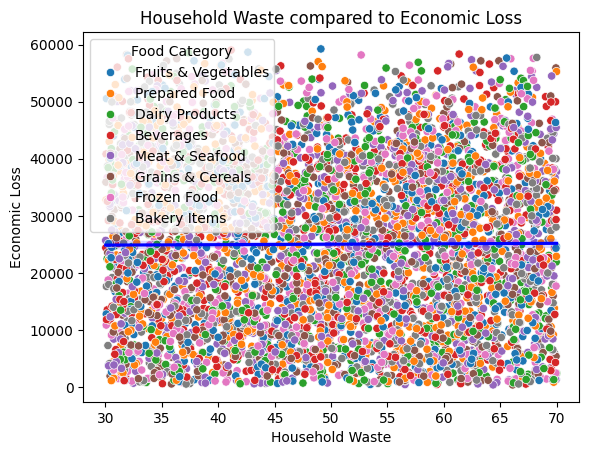

In [96]:
#data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#scatter plot & regression line

sns.scatterplot(df, x="Household Waste (%)", y="Economic Loss (Million $)", hue="Food Category")
sns.regplot(df, x="Household Waste (%)", y="Economic Loss (Million $)", color="Blue", scatter=False)
plt.title("Household Waste compared to Economic Loss")
plt.xlabel("Household Waste")
plt.ylabel("Economic Loss")
plt.show()


In [97]:
#from this we can tell that there is no significant relationship between the household waste in % and economic loss

In [98]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

X = df.drop(["Total Waste (Tons)", "Country"], axis=1)
y = df["Total Waste (Tons)"]

encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(X[["Food Category"]])

encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(["Food Category"]))



X = X.drop("Food Category", axis=1)
X = pd.concat([X, encoded_df], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#model training
lr = LinearRegression()
lr.fit(X_train, y_train)

#prediction
y_pred = lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse} & r2: {r2}" )

Mean Squared Error: 10640259.525532778 & r2: 0.9508241138772285


this is a fairly high score for my model.